# Entertainment based Student segmentation

Algorithm : Kmeans Clustering

K-Means Clustering Explained with a Fruit Example
Imagine you have a basket of different fruits, and you want to automatically group them based on how similar they are. Let's say you focus on two characteristics of each fruit: size (diameter in cm) and sweetness (on a scale of 1 to 10). You don't know beforehand which fruits belong together.

K-Means Clustering is like having a robot that tries to automatically sort these fruits into a pre-defined number of groups (let's say 3 groups).

Key Concepts of K-Means:

* K: The pre-defined number of clusters you want to find (in our example, K=3). You need to decide this beforehand.
* Centroids: The "average" data points representing the center of each cluster.
Distance: A measure of how similar two data points are (e.g., Euclidean distance based on size and sweetness).
* Iteration: The repeated process of assigning data points to clusters and updating the cluster centroids.
* Convergence: The algorithm stops when the centroids stabilize and the cluster assignments no longer change significantly.

In essence, K-Means tries to find K groups within your data such that the data points within each group are as similar to each other as possible, and the groups themselves are as different from each other as possible, based on the chosen features (size and sweetness in our example). It's a powerful and widely used algorithm for automatically discovering underlying patterns and groupings in unlabeled data.

### Dataset Details

Dataset Name : Entertainment preferences of High school students

Column description

1. name : name of the students
2. books : time spend reading books each week
3. tv_shows : time spend watching tv shows each week
4. video_games : time spend playing video games each week

# Notebook Structure

1. Import necessary dependencies
2. Import the dataset and perform initial analysis
3. Data preparation for cluster analysis
4. Kmeans Clustering - Model 1 with 2 clusters
5. Kmeans Clustering - Model 2 with 3 clusters
6. Optimize for k - Leverage Elbow method
7. Compare the clusters


# 1. Import necessary dependencies

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import the dataset and perform initial analysis

In [197]:
df = pd.read_csv('entertainment.csv')

In [198]:
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [200]:
df.shape

(150, 4)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         150 non-null    object 
 1   books        150 non-null    float64
 2   tv_shows     150 non-null    float64
 3   video_games  150 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [202]:
df.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


### Univariate analysis of the numerical columns

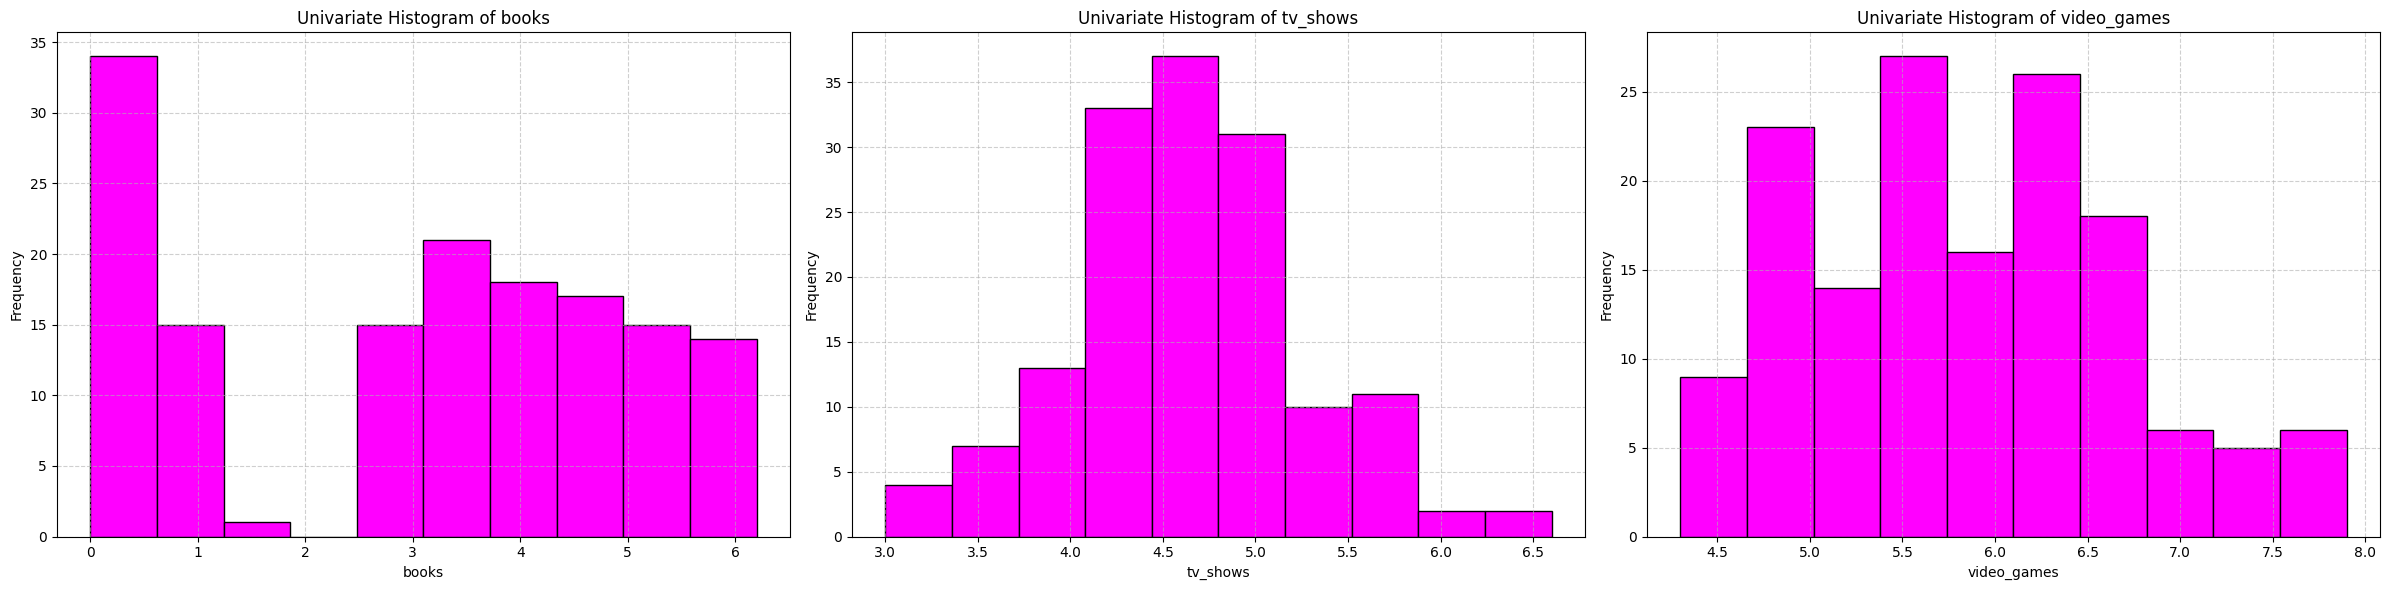

In [203]:
# List of the columns you want to create histograms for
columns_to_plot = ['books', 'tv_shows', 'video_games']

# Create a figure and a set of subplots
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 6))  # Adjust figure width

# Create a histogram for each specified column in its respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Select the current subplot
    df[column].hist(bins=10,color = 'magenta' , edgecolor='black', ax=ax)  # Use the 'ax' argument
    ax.set_title(f'Univariate Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

### Summarizing the insights

1. Books:

* The distribution for "books" appears to be right-skewed.
* There's a high frequency of individuals with very low scores (around 0-1).
* The frequency then decreases, with smaller peaks around the 3-4 range and then again around the 5-6 range.
* This suggests that most individuals in this dataset have a low affinity for books based on this metric, with fewer individuals showing higher levels of engagement.

2. TV Shows:

* The distribution for "tv_shows" seems to be approximately normal or slightly left-skewed.
* The highest frequency of individuals falls in the range of around 4.5 to 5.0.
There are noticeable frequencies around the 4.0-4.5 range as well.
* The frequencies tend to decrease as the scores move away from this central tendency towards both lower and higher values.
* This suggests a relatively consistent and moderate level of engagement with TV shows across the individuals in the dataset.

3. Video Games:

* The distribution for "video games" appears to be multimodal, with several peaks.
* There are noticeable peaks in frequency around the 4.5-5.0 range, the 5.5-6.0 range, and possibly a smaller one around the 7.0-7.5 range.
* There are also lower frequencies in the ranges between these peaks.
* This indicates that there are distinct groups of individuals with different levels of engagement with video games, rather than a single central tendency.

In summary:

* Engagement with books is generally low, with a few individuals showing higher engagement.
* Engagement with TV shows is more consistent and centered around a moderate level.
* Engagement with video games shows distinct groups with varying levels of affinity, suggesting different preferences within the dataset.

# 3. Data preparation for cluster analysis

* Row granularity : For K-means on user behavior, row granularity should represent individual users with a single entry summarizing their relevant actions to ensure each cluster captures distinct groups of users based on their overall behavioral patterns rather than individual actions.
* Missing value identification and handling : Missing values in K-means need careful identification and handling (e.g., imputation or removal) because the algorithm relies on distance calculations, which are undefined with missing data, thus potentially leading to inaccurate clustering.
* Verify if all columns are numeric in nature : Before applying K-means, it's crucial to verify that all columns used for clustering are numeric because the algorithm calculates distances based on numerical values.
* feature selection : Feature selection in K-means aims to identify the most relevant variables that effectively differentiate user behavior, leading to more meaningful and interpretable clusters.
* feature scaling : Feature scaling is essential in K-means to ensure that features with larger ranges do not disproportionately influence the distance calculations and cluster assignments, allowing all features to contribute equally to the clustering process.

### 1. Row granularity

In [204]:
df.name.nunique() , df.shape

(150, (150, 4))

So their are 150 unique names which matches the rows in the dataset , so we are at the right level of granularity

### 2. Missing value identification and handling

In [205]:
df.isnull().sum()

,0
name,0
books,0
tv_shows,0
video_games,0


The data is clean , no missing value to handle

### 3. Verify if all columns are numeric in nature

In [206]:
df.dtypes

,0
name,object
books,float64
tv_shows,float64
video_games,float64


All columns are numeric in nature , other than name

### 4. feature selection ( Drop the name column )

In [207]:
data = df.drop(columns=['name'])

In [208]:
data

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


### 5. Feature scaling

In [209]:
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


Since all the features are in the same range we can skip feature scaling for now

# 4. Kmeans Clustering - Model 1 with 2 clusters

## A. Model Creation

In [210]:
# import kmeans from sklearn
from sklearn.cluster import KMeans

In [211]:
# fit a kmeans model with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)

KMeans(n_clusters=2, random_state=42)

In [212]:
# view the cluster labels
kmeans2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [213]:
pd.Series(kmeans2.labels_).value_counts()

,count
1,100
0,50


50 students are in cluster 0 and 100 students are in cluster 1

## B. Visualization of Kmeans clustering

In summary, this code takes the original user behavior data and the cluster assignments from a K-means model, combines them into a single DataFrame, and then creates a 3D scatter plot to visualize how the users are grouped into different clusters based on their 'books', 'tv_shows', and 'video_games' behavior. The color of each point represents its assigned cluster, and a legend is added to identify which color corresponds to which cluster. This visualization helps in understanding the separation and distribution of the clusters in the 3D feature space.

### Visualization 1 : Scatter plot

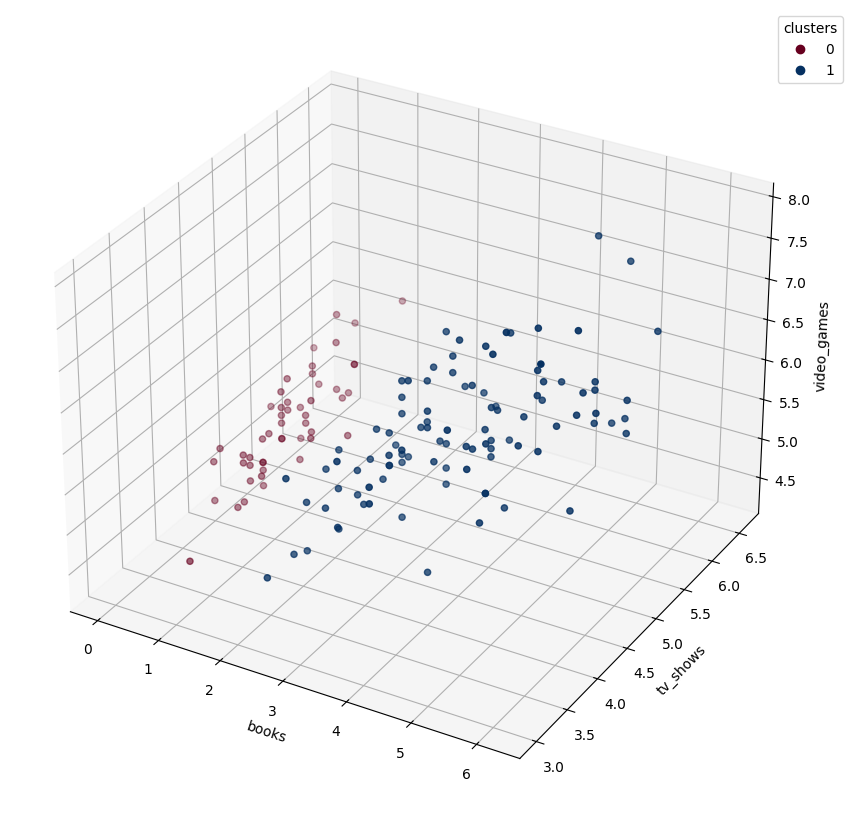

In [214]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='cluster')

# create a clean dataframe
df_clusters = pd.concat([data, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clusters['books'], df_clusters['tv_shows'], df_clusters['video_games'],
                c=df_clusters['cluster'], cmap='RdBu')
ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

In [215]:
df_clusters.head()

,books,tv_shows,video_games,cluster
0,0.5,4.6,4.9,0
1,0.0,4.5,4.8,0
2,0.5,4.5,5.0,0
3,3.5,4.5,6.6,1
4,2.8,3.8,5.6,1


### Visualization 2 : Boxplot ( Better interpretation )

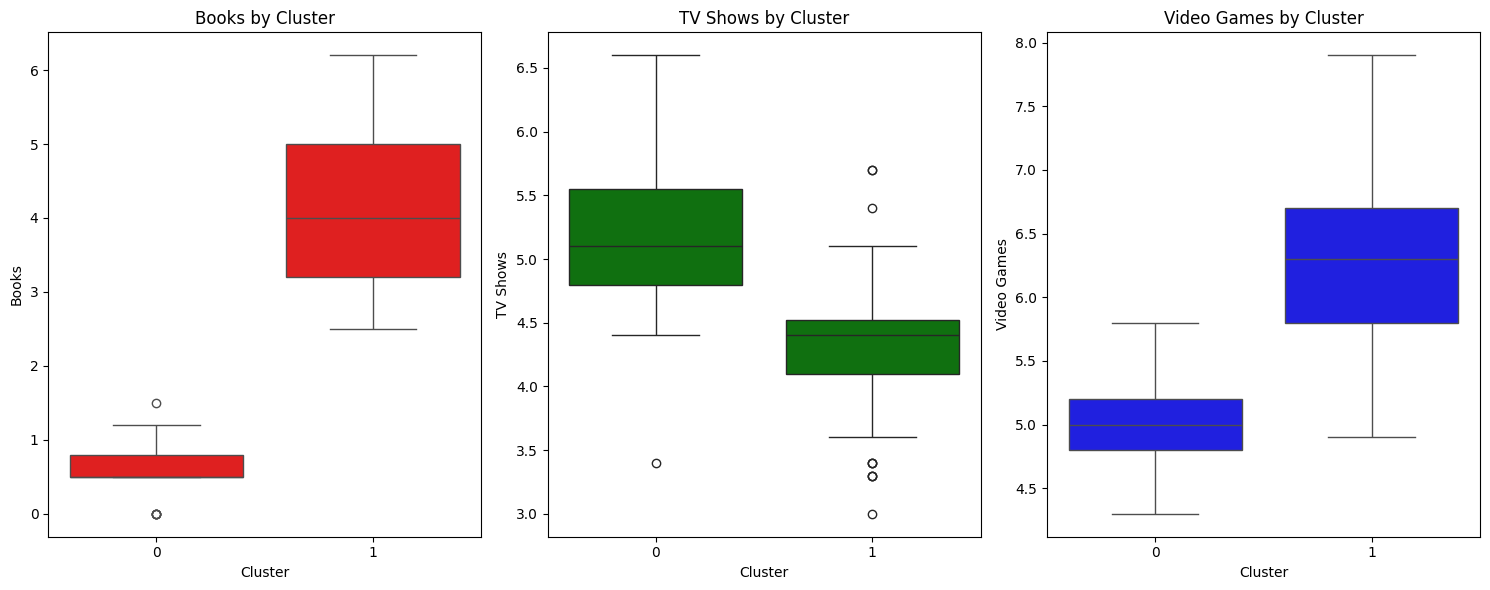

In [216]:

# Create a figure with subplots for each boxplot in one row
num_vars = 3
fig, axes = plt.subplots(1, num_vars, figsize=(15, 6))  # Adjust figsize as needed

# Create boxplot for 'books'
sns.boxplot(x='cluster', y='books', data=df_clusters, color='red', ax=axes[0])
axes[0].set_title('Books by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Books')

# Create boxplot for 'tv_shows'
sns.boxplot(x='cluster', y='tv_shows', data=df_clusters, color='green', ax=axes[1])
axes[1].set_title('TV Shows by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('TV Shows')

# Create boxplot for 'video games'
sns.boxplot(x='cluster', y='video_games', data=df_clusters, color='blue', ax=axes[2])
axes[2].set_title('Video Games by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Video Games')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

Interpretation of the Boxplots :

1. Books by Cluster (Red Boxplot):

* Cluster 0: Shows a very low median value for 'Books' (around 0.5). The distribution is quite tight, with most users in this cluster having a low number of 'Books'. There are a few outliers with slightly higher 'Books' values (around 1.2 and 1.5).
* Cluster 1: Shows a significantly higher median value for 'Books' (around 4). The distribution is wider compared to Cluster 0, indicating more variability in the number of 'Books' among users in this cluster. The range extends from around 2.5 to over 6, with no apparent outliers.
* Interpretation for Books: Cluster 1 represents users who, on average, engage with significantly more 'Books' than users in Cluster 0. Cluster 0 users show a generally low affinity for 'Books'.

2. TV Shows by Cluster (Green Boxplot):

* Cluster 0: Shows a median value for 'TV Shows' around 5. The distribution is relatively tight, with most users having 'TV Shows' values between approximately 4.5 and 5.5. There's a lower outlier around 3.4 and a higher outlier around 6.6.
* Cluster 1: Shows a lower median value for 'TV Shows' around 4.5. The distribution is also relatively tight, with most users having 'TV Shows' values between approximately 4 and 5. There are a few lower outliers around 3.3 and 3.5, and a higher outlier around 5.7.
* Interpretation for TV Shows: Cluster 0 tends to have users with slightly higher engagement in 'TV Shows' compared to Cluster 1, although the difference in medians isn't as dramatic as with 'Books'. Both clusters show a fairly consistent level of 'TV Show' consumption.

3. Video Games by Cluster (Blue Boxplot):

* Cluster 0: Shows a lower median value for 'Video Games' around 5. The distribution is somewhat wider than for 'TV Shows', ranging from approximately 4.3 to 5.8, with a lower outlier around 3.8.
* Cluster 1: Shows a significantly higher median value for 'Video Games' around 6.3. The distribution is also wider, ranging from approximately 5.9 to nearly 8, with no apparent outliers on the higher end but a lower whisker extending down to around 4.9.
* Interpretation for Video Games: Cluster 1 represents users who, on average, engage with 'Video Games' much more frequently than users in Cluster 0. Cluster 0 users show a lower to moderate level of 'Video Game' consumption.

Overall Interpretation of the Clusters:

Based on these boxplots, we can characterize the two clusters as follows:

* Cluster 0: Users in this cluster tend to have low engagement with Books, moderate to slightly higher engagement with TV Shows, and moderate to lower engagement with Video Games.
* Cluster 1: Users in this cluster tend to have high engagement with Books, moderate to slightly lower engagement with TV Shows, and high engagement with Video Games.

These visualizations clearly show how the two clusters identified by your K-means algorithm differ in their consumption patterns across the three behavioral variables. This provides valuable insights into distinct segments within your user base.

## C. Interpret Kmeans clustering

In [138]:
# view the column names
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In K-means clustering, cluster centers (also known as centroids) are the average data points that represent each of the clusters identified by the algorithm. Think of them as the "heart" or the central point of each group.

In [139]:
# view the cluster centers
kmeans2.cluster_centers_

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

Since K-means was run to find two clusters, this array has two rows. Each row represents the center of a cluster. The columns in each row correspond to the average values of the features for the users belonging to that cluster, in the same order as your data.columns.

Cluster 0 (first row: [0.596, 5.13 , 5.006]):

* books: The average value for 'books' for users in this cluster is approximately 0.596. This suggests that, on average, users in this group have relatively low engagement with books based on your metric.
* tv_shows: The average value for 'tv_shows' is approximately 5.13. This indicates a moderate to high average engagement with TV shows for this cluster.
* video_games: The average value for 'video_games' is approximately 5.006. This suggests a moderate average engagement with video games for this cluster.
* In summary, Cluster 0 represents a group of users who, on average, show low engagement with books but moderate to high engagement with both TV shows and video games.

Cluster 1 (second row: [4.192, 4.314, 6.262]):

* books: The average value for 'books' for users in this cluster is approximately 4.192. This indicates a significantly higher average engagement with books compared to Cluster 0.
* tv_shows: The average value for 'tv_shows' is approximately 4.314. This suggests a moderate average engagement with TV shows, slightly lower than Cluster 0.
* video_games: The average value for 'video_games' is approximately 6.262. This indicates a higher average engagement with video games compared to Cluster 0.
* In summary, Cluster 1 represents a group of users who, on average, show higher engagement with books and video games, with a moderate level of engagement with TV shows.

Therefore, the cluster centers provide a concise way to understand the typical behavior patterns of the different user segments identified by your K-means analysis. By looking at these average values, you can start to characterize and interpret the distinct groups of users based on their consumption of books, TV shows, and video games.

## D. Visualize Cluster centers

In [217]:
# view the cluster centers in a dataframe
cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)
cluster_centers2

,books,tv_shows,video_games
0,0.596,5.130,5.006
1,4.192,4.314,6.262


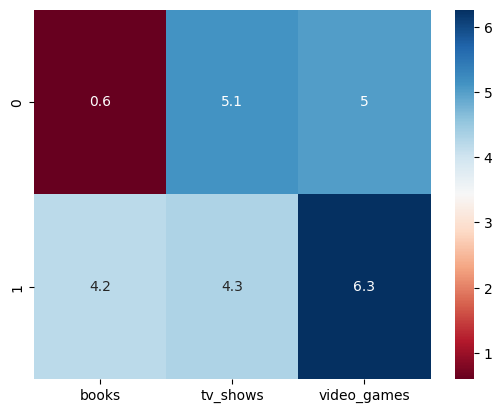

In [218]:
# view the cluster centers in a heatmap
import seaborn as sns
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True);

## E. Cluster Naming and final visualization

* Cluster 0 : Non-readers
* Cluster 1 : Entertainment Enthusiast

In [219]:
# Create a mapping for the cluster numbers to meaningful names
cluster_name_mapping = {0: 'Non readers', 1: 'Entertainment enthusiast'}

# Map the 'cluster' column in df_clean to create a new 'cluster name' column
df_clusters['cluster name'] = df_clusters['cluster'].map(cluster_name_mapping)

# The 'df' DataFrame already contains 'name', 'books', 'tv_shows', 'video_games'
# The 'df_clean' DataFrame contains 'books', 'tv_shows', 'video_games', 'cluster', 'cluster name'

# We want to combine them based on the common 'books', 'tv_shows', 'video_games'
# and add the 'cluster name' from df_clean to df.

# Merge the two DataFrames based on the common columns
final_df = pd.merge(df, df_clusters[['books', 'tv_shows', 'video_games', 'cluster name']],
                       on=['books', 'tv_shows', 'video_games'],
                       how='left')

In [220]:
# original dataset with named cluster labels
final_df

,name,books,tv_shows,video_games,cluster name
0,Aaliyah,0.5,4.6,4.9,Non readers
1,Abigail,0.0,4.5,4.8,Non readers
2,Addison,0.5,4.5,5.0,Non readers
3,Adeline,3.5,4.5,6.6,Entertainment enthusiast
4,Alana,2.8,3.8,5.6,Entertainment enthusiast
...,...,...,...,...,...
155,Winifred,5.2,4.6,6.9,Entertainment enthusiast
156,Xanthe,6.0,4.6,6.7,Entertainment enthusiast
157,Zara,5.5,5.7,7.7,Entertainment enthusiast
158,Zoe,0.0,6.1,5.2,Non readers


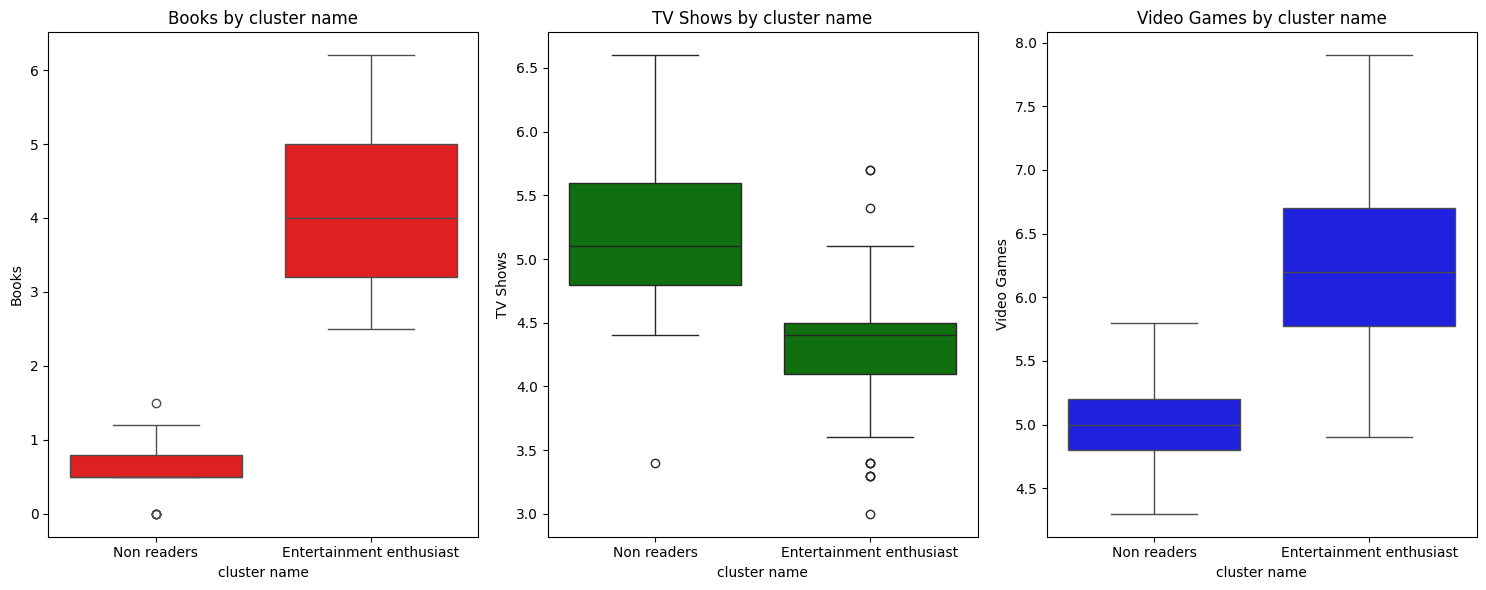

In [223]:

# Create a figure with subplots for each boxplot in one row
num_vars = 3
fig, axes = plt.subplots(1, num_vars, figsize=(15, 6))  # Adjust figsize as needed

# Create boxplot for 'books'
sns.boxplot(x='cluster name', y='books', data=final_df, color='red', ax=axes[0])
axes[0].set_title('Books by cluster name')
axes[0].set_xlabel('cluster name')
axes[0].set_ylabel('Books')

# Create boxplot for 'tv_shows'
sns.boxplot(x='cluster name', y='tv_shows', data=final_df, color='green', ax=axes[1])
axes[1].set_title('TV Shows by cluster name')
axes[1].set_xlabel('cluster name')
axes[1].set_ylabel('TV Shows')

# Create boxplot for 'video games'
sns.boxplot(x='cluster name', y='video_games', data=final_df, color='blue', ax=axes[2])
axes[2].set_title('Video Games by cluster name')
axes[2].set_xlabel('cluster name')
axes[2].set_ylabel('Video Games')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

# 5. Kmeans Clustering - Model 2 with 3 clusters

## A. Kmeans model creation with 3 clusters

In [224]:
# fit a kmeans model with 3 clusters
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

In [225]:
# view the cluster labels
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0], dtype=int32)

In [226]:
pd.Series(kmeans3.labels_).value_counts()

,count
2,52
0,50
1,48


## B. Visualization of Kmeans clustering

In [237]:

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans3.labels_, name='cluster')

# create a clean dataframe
df_clusters3 = pd.concat([data, cluster_labels], axis=1)

In [238]:
df_clusters3['cluster'].value_counts()

,count
cluster,
2,52
0,50
1,48


In [239]:
df_clusters3.head()

,books,tv_shows,video_games,cluster
0,0.5,4.6,4.9,0
1,0.0,4.5,4.8,0
2,0.5,4.5,5.0,0
3,3.5,4.5,6.6,2
4,2.8,3.8,5.6,2


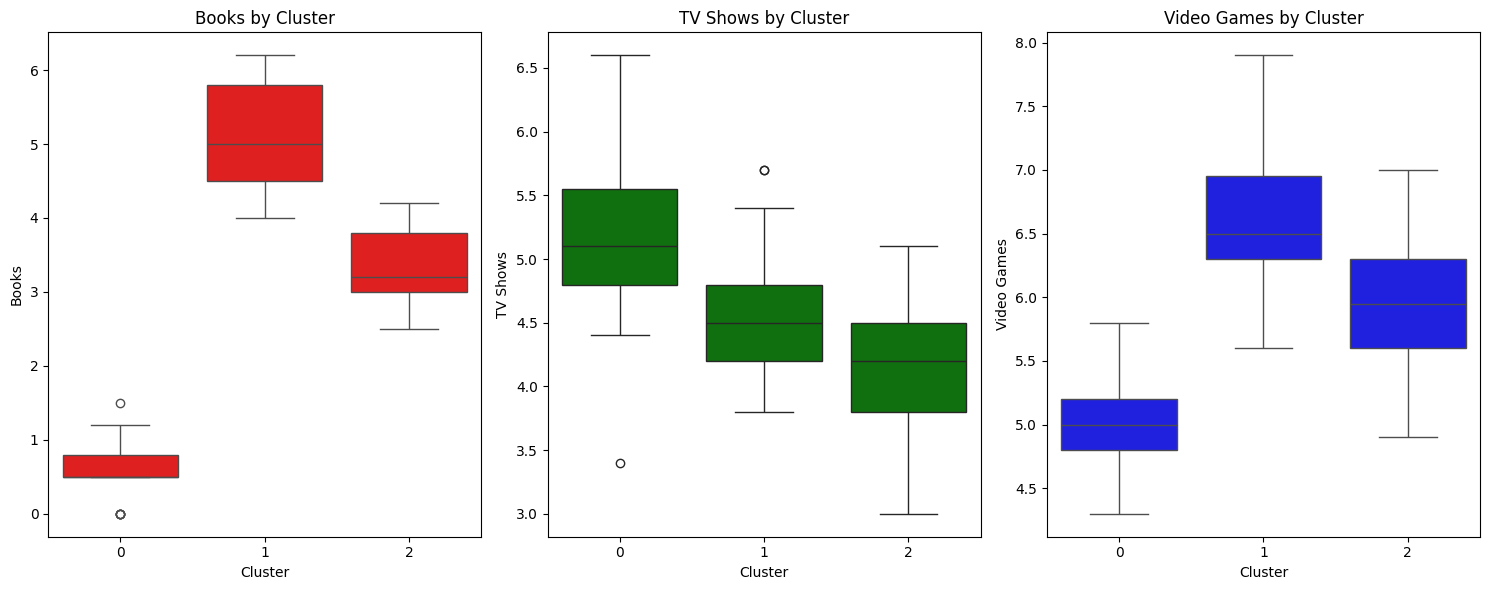

In [231]:

# Create a figure with subplots for each boxplot in one row
num_vars = 3
fig, axes = plt.subplots(1, num_vars, figsize=(15, 6))  # Adjust figsize as needed

# Create boxplot for 'books'
sns.boxplot(x='cluster', y='books', data=df_clusters3, color='red', ax=axes[0])
axes[0].set_title('Books by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Books')

# Create boxplot for 'tv_shows'
sns.boxplot(x='cluster', y='tv_shows', data=df_clusters3, color='green', ax=axes[1])
axes[1].set_title('TV Shows by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('TV Shows')

# Create boxplot for 'video games'
sns.boxplot(x='cluster', y='video_games', data=df_clusters3, color='blue', ax=axes[2])
axes[2].set_title('Video Games by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Video Games')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

1. Books by Cluster (Red Boxplot):

* Cluster 0: Shows a very low median value for 'Books' (close to 0.5). The distribution is relatively tight, with most users in this cluster having a low number of 'Books'. There's a small outlier at a higher 'Books' value.
* Cluster 1: Shows a significantly higher median value for 'Books' (around 4.5 to 5). The distribution is wider compared to Cluster 0, indicating more variability in the number of 'Books' among users in this cluster.
* Cluster 2: Shows a median value for 'Books' that is higher than Cluster 0 but lower than Cluster 1 (around 3 to 3.5). The distribution is also relatively tight compared to Cluster 1.
* Interpretation for Books: Cluster 1 represents users with the highest engagement in 'Books', followed by Cluster 2, while Cluster 0 represents users with the lowest engagement.

2. TV Shows by Cluster (Green Boxplot):

* Cluster 0: Shows a median value for 'TV Shows' around 5. The distribution is moderately wide, with values ranging from around 3.5 to 6.
* Cluster 1: Shows a lower median value for 'TV Shows' (around 4.5). The distribution is also moderately wide, with a noticeable lower outlier.
* Cluster 2: Shows the lowest median value for 'TV Shows' (around 4). The distribution is somewhat tighter compared to the other clusters.
* Interpretation for TV Shows: Cluster 0 tends to have users with the highest engagement in 'TV Shows', followed by Cluster 1, and then Cluster 2 with the lowest average engagement.

3. Video Games by Cluster (Blue Boxplot):

* Cluster 0: Shows a low median value for 'Video Games' (around 5). The distribution is relatively tight.
* Cluster 1: Shows the highest median value for 'Video Games' (around 6.5). The distribution is wider, indicating more variability in 'Video Game' engagement within this cluster.
* Cluster 2: Shows a median value for 'Video Games' that is higher than Cluster 0 but lower than Cluster 1 (around 5.5 to 6). The distribution is also relatively tight.
* Interpretation for Video Games: Cluster 1 represents users with the highest engagement in 'Video Games', followed by Cluster 2, while Cluster 0 represents users with the lowest engagement.

Overall Interpretation of the Clusters:

Based on these boxplots, we can characterize the three clusters as follows:

* Cluster 0: Users in this cluster show low engagement with Books and Video Games but have the highest engagement with TV Shows.
* Cluster 1: Users in this cluster show the highest engagement with Books and Video Games but have moderate engagement with TV Shows.
* Cluster 2: Users in this cluster show moderate engagement with Books and Video Games and the lowest engagement with TV Shows.

These visualizations provide a clear picture of the distinct behavioral patterns of the three user segments identified by your K-means clustering. Each cluster exhibits a unique profile in terms of their consumption of books, TV shows, and video games.

## C. Visualization of the cluster centres

In [240]:
# view the column names
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [241]:
# view the cluster centers
kmeans3.cluster_centers_

array([[0.596     , 5.13      , 5.006     ],
       [5.14375   , 4.52708333, 6.63958333],
       [3.31346154, 4.11730769, 5.91346154]])

In [242]:
# view the cluster centers in a dataframe
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
cluster_centers3

,books,tv_shows,video_games
0,0.596000,5.130000,5.006000
1,5.143750,4.527083,6.639583
2,3.313462,4.117308,5.913462


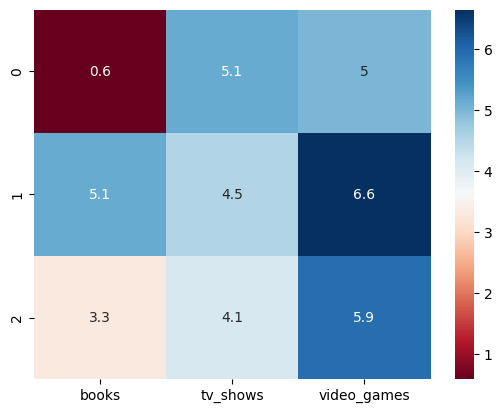

In [243]:
# view the cluster centers in a heatmap
import seaborn as sns
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

## D. Logical naming of the clusters

In [179]:
# Cluster 0 : Non readers
# Cluster 1 : Entertainment Enthusiast
# Cluster 2 : Prefers Video games to books

## E. Update the cluster labels with names and visualize through box plot

In [244]:
# Create a mapping for the cluster numbers to meaningful names
cluster_name_mapping = {0: 'Non readers', 1: 'Entertainment enthusiast' , 2: 'Prefers Video games to books'}

# Map the 'cluster' column in df_clean to create a new 'cluster name' column
df_clusters3['cluster name'] = df_clusters3['cluster'].map(cluster_name_mapping)

# The 'df' DataFrame already contains 'name', 'books', 'tv_shows', 'video_games'
# The 'df_clean' DataFrame contains 'books', 'tv_shows', 'video_games', 'cluster', 'cluster name'

# We want to combine them based on the common 'books', 'tv_shows', 'video_games'
# and add the 'cluster name' from df_clean to df.

# Merge the two DataFrames based on the common columns
final_df = pd.merge(df, df_clusters3[['books', 'tv_shows', 'video_games', 'cluster name']],
                       on=['books', 'tv_shows', 'video_games'],
                       how='left')

In [245]:
final_df

,name,books,tv_shows,video_games,cluster name
0,Aaliyah,0.5,4.6,4.9,Non readers
1,Abigail,0.0,4.5,4.8,Non readers
2,Addison,0.5,4.5,5.0,Non readers
3,Adeline,3.5,4.5,6.6,Prefers Video games to books
4,Alana,2.8,3.8,5.6,Prefers Video games to books
...,...,...,...,...,...
155,Winifred,5.2,4.6,6.9,Entertainment enthusiast
156,Xanthe,6.0,4.6,6.7,Entertainment enthusiast
157,Zara,5.5,5.7,7.7,Entertainment enthusiast
158,Zoe,0.0,6.1,5.2,Non readers


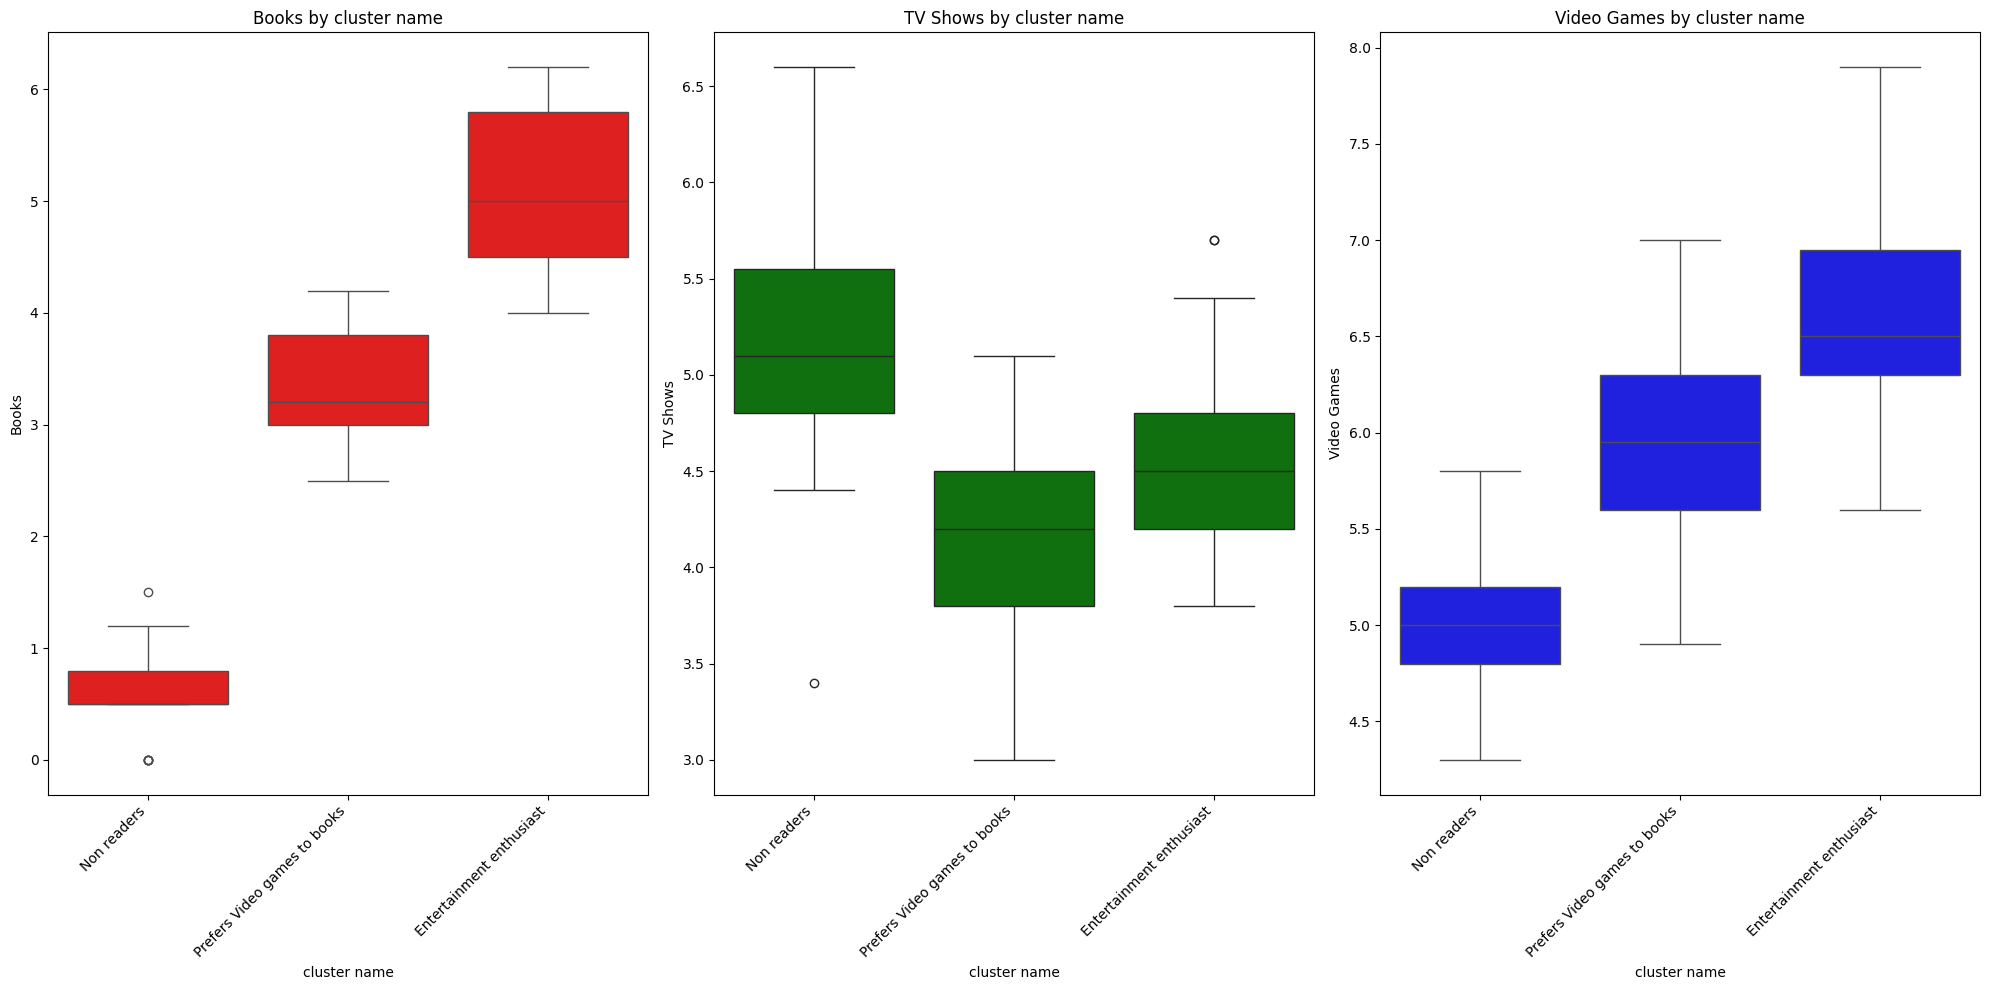

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with subplots for each boxplot in one row
num_vars = 3
fig, axes = plt.subplots(1, num_vars, figsize=(20, 10))  # Adjusted figsize for better label visibility

# Create boxplot for 'books'
sns.boxplot(x='cluster name', y='books', data=df_clusters3, color='red', ax=axes[0])
axes[0].set_title('Books by cluster name')
axes[0].set_ylabel('Books')
# Rotate x-axis labels and align to the right using set_xticklabels
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Create boxplot for 'tv_shows'
sns.boxplot(x='cluster name', y='tv_shows', data=df_clusters3, color='green', ax=axes[1])
axes[1].set_title('TV Shows by cluster name')
axes[1].set_ylabel('TV Shows')
# Rotate x-axis labels and align to the right using set_xticklabels
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Create boxplot for 'video games'
sns.boxplot(x='cluster name', y='video_games', data=df_clusters3, color='blue', ax=axes[2])
axes[2].set_title('Video Games by cluster name')
axes[2].set_ylabel('Video Games')
# Rotate x-axis labels and align to the right using set_xticklabels
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

# 6. Optimize for k - Leverage Elbow method

Elbow Method

The Elbow Method is a visual technique used to help determine the optimal number of clusters (K) for a K-Means clustering algorithm. It works by plotting the inertia (within-cluster sum of squares - WCSS) against the number of clusters.

Think of it like this:

* Imagine you're trying to break down a complex task into smaller, manageable sub-tasks (like forming clusters).
* If you have very few sub-tasks (small K): Each sub-task will be quite large and contain a lot of diverse elements. The "effort" or "cost" associated with each sub-task being too broad will be high. In K-Means, this "cost" is represented by high inertia – data points within each cluster are far from their centroid.
* As you increase the number of sub-tasks (increase K): Each sub-task becomes smaller and more focused. The "effort" or "cost" associated with each sub-task being too broad will decrease. Similarly, in K-Means, as you add more clusters, data points become closer to their respective centroids, and the inertia decreases.
* The "Elbow" Point: The idea is that at some point, adding more sub-tasks (clusters) doesn't significantly reduce the "effort" or "cost" anymore. You've likely found a good balance where the sub-tasks are reasonably well-defined. In K-Means, this point is visualized as an "elbow" in the plot of inertia versus the number of clusters.

How to Use the Elbow Plot:

* Run K-Means for a Range of K Values: You start by running the K-Means algorithm multiple times, each time with a different number of clusters (e.g., K=1, 2, 3, ..., 10).
* Calculate Inertia for Each K: For each value of K, after the K-Means algorithm converges, you calculate the inertia. Inertia is the sum of squared distances of samples to their closest cluster center. Lower inertia is generally better as it indicates that the data points are tightly grouped within their clusters.
* Plot Inertia vs. Number of Clusters: You then plot the calculated inertia values against the corresponding number of clusters (K). This creates a line plot.
* Identify the "Elbow": You look for a point in the plot where the decrease in inertia starts to slow down noticeably, forming an "elbow" shape. This point suggests that you've added enough clusters to capture most of the meaningful structure in the data, and adding more clusters beyond this point might lead to overfitting or less meaningful divisions.

Important Considerations:

* The "Elbow" Might Not Always Be Clear: In some datasets, the elbow might not be very distinct, making it harder to pinpoint the optimal K.
* Subjectivity: Identifying the elbow can sometimes be subjective. Different people might see the "bend" at slightly different points.
* Other Methods: The elbow method is a heuristic approach. It's often used in conjunction with other cluster evaluation metrics (like silhouette score) and domain knowledge to make a more informed decision about the number of clusters.

In summary, the elbow method provides a visual guide to help you choose a reasonable number of clusters in K-Means by looking for the point where adding more clusters yields diminishing returns in terms of reducing the within-cluster variance (inertia).

In [247]:
# view previous inertia values
kmeans2.inertia_, kmeans3.inertia_

(206.44200000000004, 105.47568525641027)

## A. Calculating the inertia corresponding to different values of k

This code block iterates through a range of potential cluster numbers (from 2 to 15). For each number of clusters (k), it initializes and fits a K-Means clustering model to the provided data. After fitting, it extracts the inertia value (a measure of within-cluster variance) from the fitted model and appends it to the inertia_values list. This list will subsequently be used to plot an elbow chart to help determine the optimal number of clusters.

In [189]:
# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

## B. Plot the inertia values against different k values

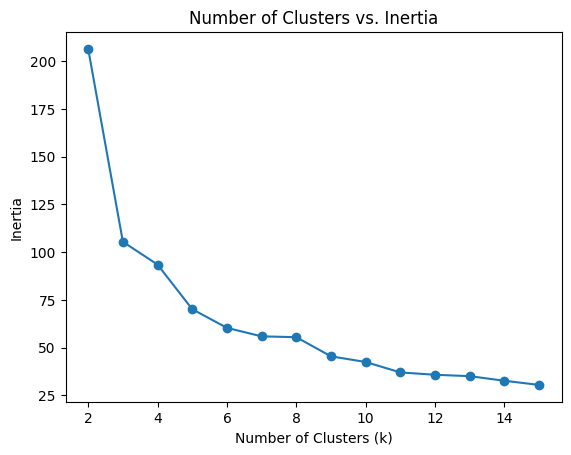

In [248]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

## Interpretation of the Elbow Chart

The elbow plot shows the relationship between the number of clusters (k) and the inertia (within-cluster sum of squares) for a K-means clustering analysis. The goal of the elbow method is to identify the "elbow" point, which is the value of k where the decrease in inertia starts to slow down significantly. This point is often considered a good trade-off between minimizing inertia and having a reasonable number of clusters.

Insights from the Elbow Plot :

* General Trend: As the number of clusters (k) increases, the inertia generally decreases. This is because as you add more clusters, each data point can be closer to its centroid, thus reducing the within-cluster variance.

* k=3 (A Potential "Elbow"): At k=3, there is a noticeable bend or "elbow" in the curve. The inertia drops sharply from k=2 to k=3, but the rate of decrease starts to lessen after k=3. This suggests that 3 clusters might capture a significant amount of the underlying structure in the data, and adding more clusters beyond this point might not provide a substantial reduction in inertia relative to the increase in model complexity (more clusters). Therefore, k=3 could be a reasonable choice for the optimal number of clusters.

* k=5 (Another Potential, Weaker "Elbow"): While the bend at k=3 is more pronounced, there might be a smaller, less sharp "elbow" or a change in the rate of decrease around k=5. The drop in inertia from k=4 to k=5 is still relatively noticeable, but it further flattens out after k=5. This suggests that k=5 is another potential candidate for the optimal number of clusters, implying a finer-grained segmentation of the data compared to k=3.

In summary:

The elbow plot suggests that k=3 is a strong candidate for the optimal number of clusters due to the clear "elbow" shape at this point, indicating a good balance between minimizing within-cluster variance and the number of clusters.
k=5 is also a potentially important point, representing a further refinement of the clusters. While the "elbow" is less distinct here, the continued decrease in inertia might be meaningful depending on the specific goals of the clustering analysis and the interpretability of the resulting clusters.
To make a final decision on the optimal number of clusters, you would typically consider the insights from the elbow plot alongside other factors such as domain knowledge, the interpretability of the resulting clusters, and potentially other evaluation metrics like silhouette score.

We have already build a kmeans model with 3 clusters :

* Cluster 0: Non-readers
* Cluster 1: Entertainment enthusiasts
* Cluster 2: Prefer video games to books

Lets try kmeans with 5 clusters

## C. Build a kmeans model with k=5

In [249]:
# now for 5 clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data)

KMeans(n_clusters=5, random_state=42)

In [250]:
kmeans5.labels_

array([3, 3, 3, 1, 2, 4, 1, 2, 3, 1, 1, 3, 3, 3, 3, 0, 1, 3, 4, 4, 1, 2,
       2, 4, 2, 1, 3, 0, 0, 4, 2, 1, 4, 1, 4, 2, 1, 3, 0, 4, 2, 2, 3, 0,
       1, 2, 3, 1, 3, 4, 4, 1, 1, 2, 1, 4, 0, 1, 2, 2, 3, 0, 3, 2, 4, 1,
       0, 2, 1, 1, 1, 4, 2, 4, 2, 1, 2, 1, 2, 1, 1, 4, 3, 3, 3, 1, 1, 3,
       0, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 2, 2, 4, 1, 3, 4, 3, 0,
       4, 4, 3, 3, 3, 4, 1, 3, 4, 2, 1, 4, 3, 0, 3, 4, 2, 1, 1, 0, 3, 3,
       4, 0, 2, 4, 1, 1, 1, 2, 3, 3, 2, 1, 2, 4, 4, 4, 0, 3], dtype=int32)

In [251]:
pd.Series(kmeans5.labels_).value_counts()

,count
1,39
3,36
2,33
4,28
0,14


## D. Visualization of Kmeans clustering ( k=5)

In [254]:

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans5.labels_, name='cluster')

# create a clean dataframe
df_clusters5 = pd.concat([data, cluster_labels], axis=1)

In [255]:
df_clusters5.head()

,books,tv_shows,video_games,cluster
0,0.5,4.6,4.9,3
1,0.0,4.5,4.8,3
2,0.5,4.5,5.0,3
3,3.5,4.5,6.6,1
4,2.8,3.8,5.6,2


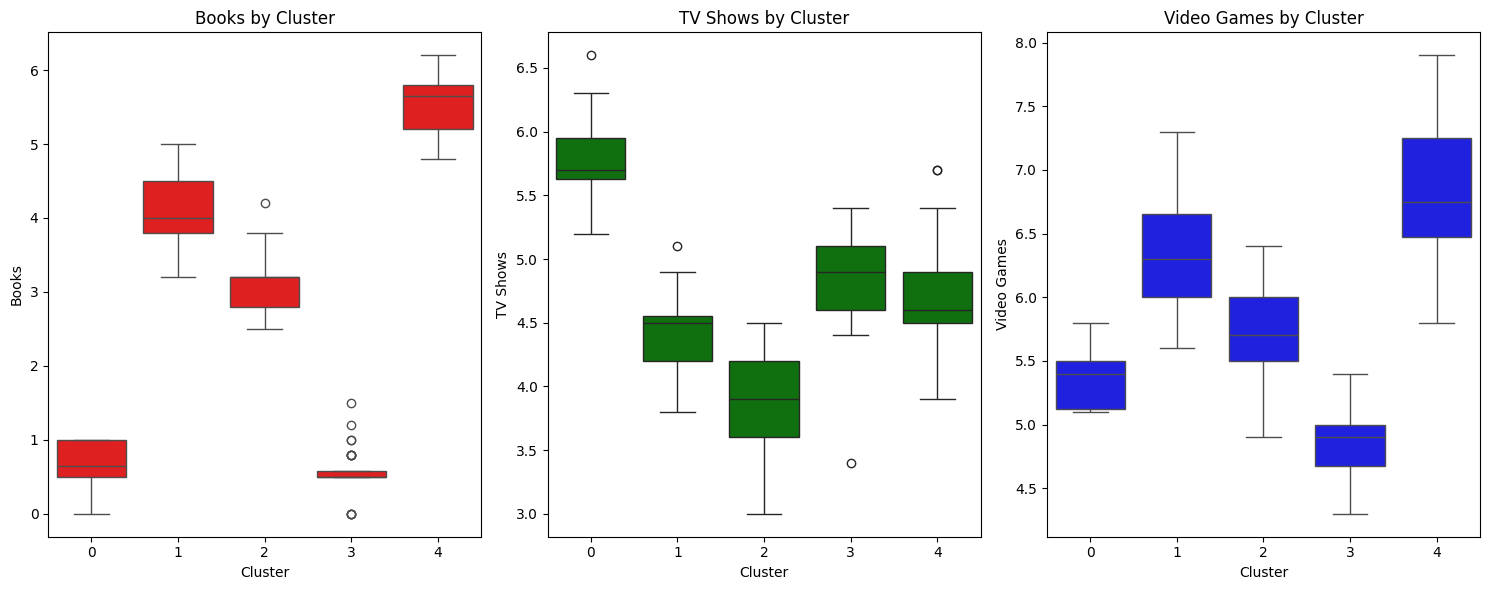

In [256]:

# Create a figure with subplots for each boxplot in one row
num_vars = 3
fig, axes = plt.subplots(1, num_vars, figsize=(15, 6))  # Adjust figsize as needed

# Create boxplot for 'books'
sns.boxplot(x='cluster', y='books', data=df_clusters5, color='red', ax=axes[0])
axes[0].set_title('Books by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Books')

# Create boxplot for 'tv_shows'
sns.boxplot(x='cluster', y='tv_shows', data=df_clusters5, color='green', ax=axes[1])
axes[1].set_title('TV Shows by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('TV Shows')

# Create boxplot for 'video games'
sns.boxplot(x='cluster', y='video_games', data=df_clusters5, color='blue', ax=axes[2])
axes[2].set_title('Video Games by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Video Games')

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

## Interpretation of the Box plot

1. Books by Cluster (Red Boxplot):

* Cluster 0: Shows the lowest median engagement with 'Books', with most values clustered near 0.
* Cluster 1: Shows a moderate median engagement with 'Books', higher than Cluster 0.
* Cluster 2: Shows a median engagement with 'Books' similar to Cluster 1, but with a wider distribution and some higher outliers.
* Cluster 3: Shows a relatively low median engagement with 'Books', higher than Cluster 0 but lower than Clusters 1 and 2. It also exhibits several high outliers.
* Cluster 4: Shows the highest median engagement with 'Books', with a relatively tight distribution compared to Clusters 2 and 3.
* Interpretation for Books: Cluster 4 represents users with the highest book engagement, while Cluster 0 represents those with the lowest. Clusters 1 and 2 show moderate engagement, with Cluster 2 having more variability. Cluster 3 shows lower moderate engagement with some highly engaged outliers.

2. TV Shows by Cluster (Green Boxplot):

* Cluster 0: Shows a high median engagement with 'TV Shows'.
* Cluster 1: Shows a low median engagement with 'TV Shows'.
* Cluster 2: Shows a very low median engagement with 'TV Shows'.
* Cluster 3: Shows a moderate median engagement with 'TV Shows', higher than Clusters 1 and 2 but lower than Cluster 0.
* Cluster 4: Shows a moderate median engagement with 'TV Shows', similar to Cluster 3.
* Interpretation for TV Shows: Cluster 0 represents users with the highest TV show engagement, while Clusters 1 and 2 represent those with the lowest. Clusters 3 and 4 show moderate engagement.

3. Video Games by Cluster (Blue Boxplot):

* Cluster 0: Shows a low median engagement with 'Video Games'.
* Cluster 1: Shows a moderate median engagement with 'Video Games', higher than Cluster 0.
* Cluster 2: Shows a low median engagement with 'Video Games', similar to Cluster 0.
* Cluster 3: Shows a very low median engagement with 'Video Games'.
* Cluster 4: Shows the highest median engagement with 'Video Games'.
* Interpretation for Video Games: Cluster 4 represents users with the highest video game engagement, while Cluster 3 represents those with the lowest. Clusters 1 shows moderate engagement, while Clusters 0 and 2 show low engagement.

Overall Interpretation of the Clusters:

Based on these boxplots, we can attempt to characterize the five clusters:

* Cluster 0: High TV Show engagement, low Books and Video Games engagement.
* Cluster 1: Moderate Books and Video Games engagement, low TV Show engagement.
* Cluster 2: Moderate Books engagement, low TV Shows and Video Games engagement.
* Cluster 3: Low engagement across all three categories, particularly low for Video Games.
* Cluster 4: High engagement in Books and Video Games, moderate TV Show engagement.

These interpretations provide a profile for each of the five user segments identified by your clustering algorithm. The different clusters exhibit distinct patterns of engagement across the three media types.

## E. Visualization of Cluster centers with K=5

In [257]:
# view the cluster centers in a dataframe
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data.columns)
cluster_centers5

,books,tv_shows,video_games
0,0.685714,5.814286,5.378571
1,4.148718,4.392308,6.335897
2,3.087879,3.909091,5.657576
3,0.561111,4.863889,4.861111
4,5.553571,4.682143,6.871429


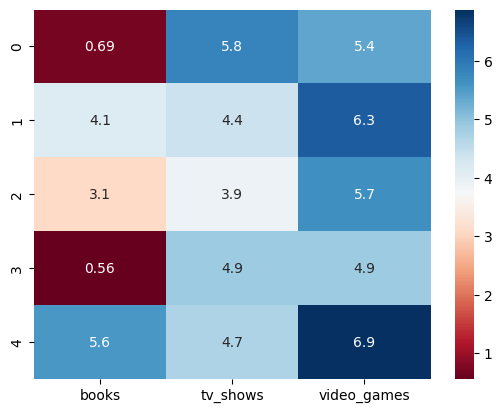

In [258]:
# view the cluster centers in a heatmap for 5 clusters
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

# 7. Compare the clusters

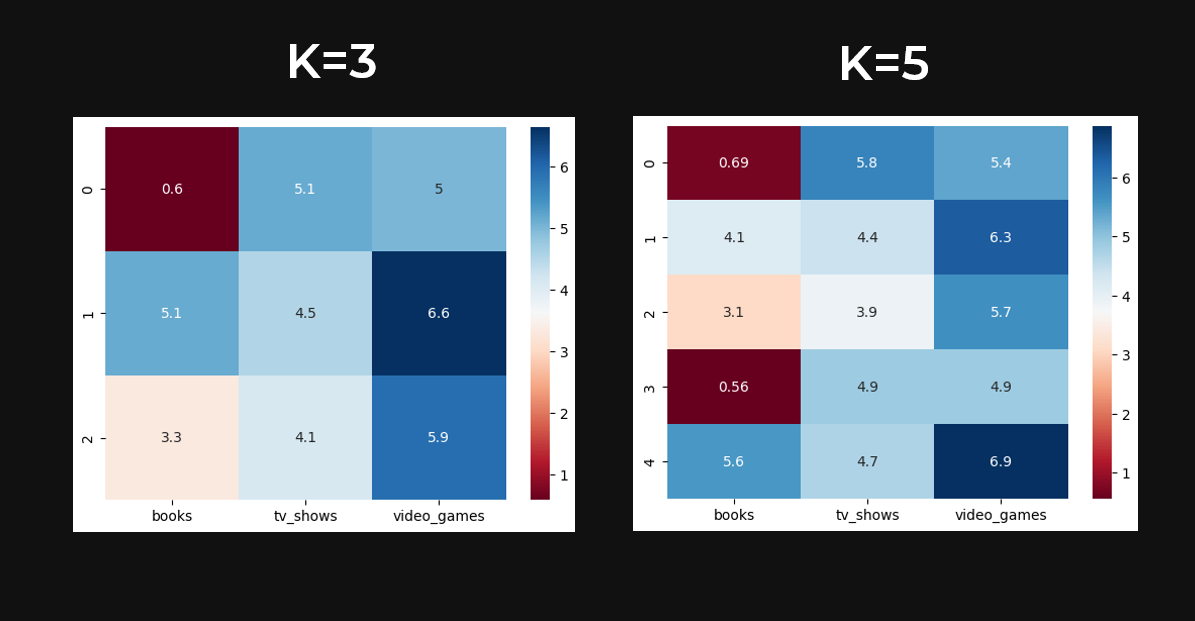

K=3 Cluster Centers:

* Cluster 0: Low on 'books' (0.6), moderate on 'tv_shows' (5.1), moderate on 'video_games' (5).
* Cluster 1: Moderate on 'books' (5.1), moderate on 'tv_shows' (4.5), high on 'video_games' (6.6).
* Cluster 2: Moderate on 'books' (3.3), low on 'tv_shows' (4.1), moderate on 'video_games' (5.9).

Potential Interpretations for K=3:

* Cluster 0: Individuals with a low interest in books but a moderate interest in other entertainment.
* Cluster 1: Individuals with a moderate interest in books and TV shows but a high interest in video games.
* Cluster 2: Individuals with a moderate interest in books and video games but a lower interest in TV shows compared to the other clusters.

K=5 Cluster Centers:

* Cluster 0: Very low on 'books' (0.69), high on 'tv_shows' (5.8), moderate on 'video_games' (5.4).
* Cluster 1: Moderate on 'books' (4.1), moderate on 'tv_shows' (4.4), high on 'video_games' (6.3).
* Cluster 2: Low to moderate on 'books' (3.1), low on 'tv_shows' (3.9), moderate on 'video_games' (5.7).
* Cluster 3: Very low on 'books' (0.56), moderate on 'tv_shows' (4.9), low on 'video_games' (4.9).
* Cluster 4: High on 'books' (5.6), moderate on 'tv_shows' (4.7), very high on 'video_games' (6.9).

Potential Interpretations for K=5:

* Cluster 0: Individuals with very low interest in books but high interest in TV shows and moderate in video games.
* Cluster 1: Individuals with moderate interest across all three, leaning slightly higher in video games.
* Cluster 2: Individuals with moderate interest in books and video games but low interest in TV shows.
* Cluster 3: Individuals with very low interest in books and video games but moderate interest in TV shows.
* Cluster 4: Individuals with high interest in books and video games and moderate interest in TV shows.

Which is More Interpretable?

Both K=3 and K=5 offer potentially interpretable clusters, but they provide different levels of granularity:

* K=3: Offers broader, more general user segments. The distinctions between the clusters are relatively clear and easy to articulate.
* K=5: Provides more specific and nuanced user segments.1 While potentially more accurate in capturing finer differences in behavior, the interpretations can become slightly more complex, and the distinctions between some clusters might be less pronounced (e.g., distinguishing between Cluster 0 and Cluster 3 in K=5, both having very low book engagement and moderate TV show engagement but differing slightly in video games).

Conclusion:

The interpretability depends on the desired level of detail and the business context.

* If you need a high-level understanding of the main user groups, K=3 might be more interpretable due to its simpler and more distinct segments.
* If you require a more granular understanding and can act upon more specific user behaviors, K=5 might be more valuable, even if the interpretations are slightly more involved.
*  However, K=3 offers a more immediately clear and concise segmentation, making it potentially easier to understand and communicate. The jump to K=5 introduces more complexity, which might be justified if the finer distinctions are crucial.